In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import math
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

### kNN
- 

In [3]:
#read in used car CSV file
df = pd.read_csv('/Users/tk/ASU/STP494/data/susedcars.csv')

In [4]:
print(df.info())
print(df.shape)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1000 non-null   int64  
 1   trim          1000 non-null   object 
 2   isOneOwner    1000 non-null   object 
 3   mileage       1000 non-null   float64
 4   year          1000 non-null   int64  
 5   color         1000 non-null   object 
 6   displacement  1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB
None
(1000, 7)


,price,trim,isOneOwner,mileage,year,color,displacement
0,43995,550,f,36858.0,2008,Silver,5.5
1,44995,550,f,46883.0,2012,Black,4.6
2,25999,550,f,108759.0,2007,White,5.5
3,33880,550,f,35187.0,2007,Black,5.5
4,34895,550,f,48153.0,2007,Black,5.5


<AxesSubplot:xlabel='mileage', ylabel='price'>

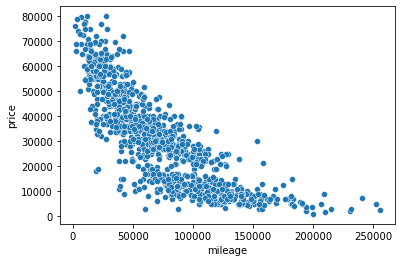

In [5]:
sns.scatterplot(x='mileage',y='price',data=df)

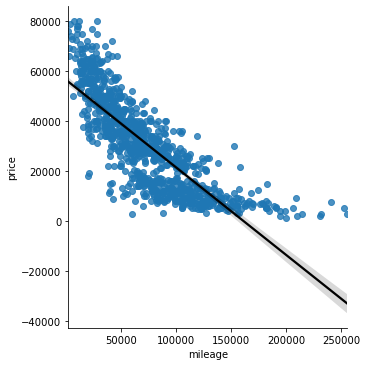

In [6]:
sns.lmplot(x='mileage',y='price',data=df,line_kws={'color':'black'})

In [7]:
knmodel = KNeighborsRegressor(n_neighbors=20)

In [8]:
X = np.asarray(df['mileage']).reshape(-1,1)
y = np.asarray(df['price']).reshape(-1,1)

In [9]:
X.shape

(1000, 1)

In [10]:
knmodel.fit(X,y)

KNeighborsRegressor(n_neighbors=20)

In [11]:
#numpy.newaxis is used to explicitly increase the dimension of the existing array by one more dimension by either row or column
Xtest = np.sort(X[:,0])[:,np.newaxis]

In [12]:
# n x m dimensions are now 1000 x 1
Xtest.shape

(1000, 1)

In [13]:
# Make sure the data looks sorted and correct
Xtest

array([[  1997.],
       [  2325.],
       [  2714.],
       [  3779.],
       [  4171.],
       [  5562.],
       [  5884.],
       [  6422.],
       [  7153.],
       [  7944.],
       [  8600.],
       [  9158.],
       [  9371.],
       [  9862.],
       [  9894.],
       [ 10010.],
       [ 10103.],
       [ 10285.],
       [ 10321.],
       [ 12005.],
       [ 12097.],
       [ 12142.],
       [ 12457.],
       [ 12692.],
       [ 12726.],
       [ 12841.],
       [ 12926.],
       [ 12974.],
       [ 13083.],
       [ 13173.],
       [ 13390.],
       [ 13704.],
       [ 13761.],
       [ 13783.],
       [ 13897.],
       [ 14119.],
       [ 14285.],
       [ 14319.],
       [ 14370.],
       [ 14530.],
       [ 14656.],
       [ 14747.],
       [ 14750.],
       [ 14952.],
       [ 15205.],
       [ 15320.],
       [ 15404.],
       [ 15789.],
       [ 15877.],
       [ 16431.],
       [ 16660.],
       [ 17027.],
       [ 17200.],
       [ 17287.],
       [ 17363.],
       [ 1

In [14]:
yhat = knmodel.predict(Xtest)

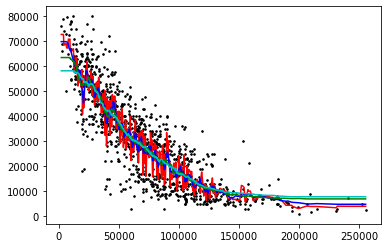

In [15]:
num_k=[5,20,50,100]
mpl_colors = ['r', 'b', 'g', 'c', 'm', 'y']
plt.scatter(X,y,s=10,c='k',marker='.')
i=0
for n in (num_k):
    knmodel = KNeighborsRegressor(n_neighbors=n)
    knmodel.fit(X,y)
    yhat = knmodel.predict(Xtest)
    plt.plot(Xtest,yhat,mpl_colors[i])
    i+=1
   

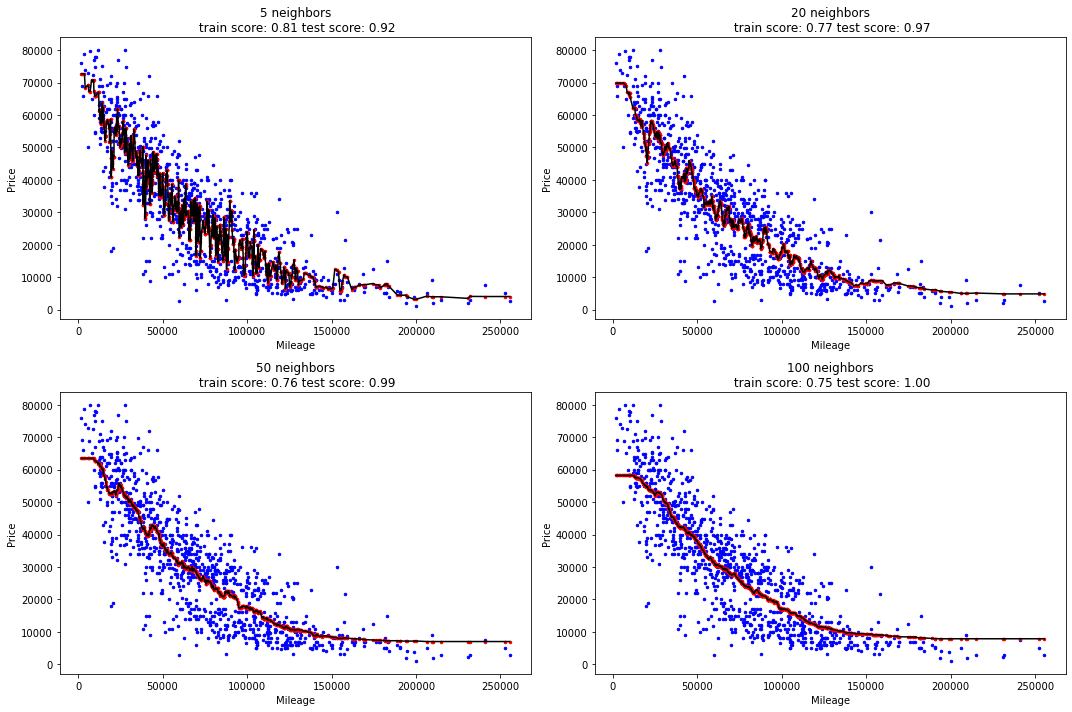

In [52]:
fig, axes = plt.subplots(2,2,figsize=(15, 10))

#generate subplots for number of neighbors = 5,20,50,100
for n_neighbors, ax in zip([5, 20, 50, 100], axes.ravel()):

    knmodel = KNeighborsRegressor(n_neighbors=n_neighbors)
    knmodel.fit(X, y)
    
    ax.plot(X, y, '.', c='blue',   
             markersize=5)
    ax.plot(Xtest, knmodel.predict(Xtest), '.', c='red', markersize=5)
    ax.plot(Xtest, knmodel.predict(Xtest), c='black')
    
    ax.set_title("{} neighbors\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, knmodel.score(X, y),
        knmodel.score(Xtest, yhat)))
    ax.set_xlabel("Mileage")
    ax.set_ylabel("Price")

fig.tight_layout()